In [ ]:
from google.colab import drive
# Accessing My Google Drive
drive.mount('/content/drive')

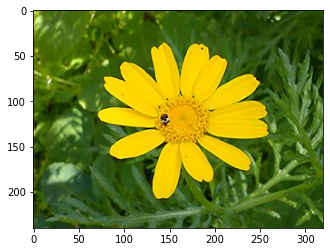

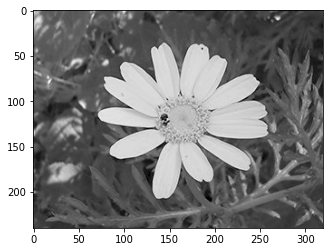

array([[189, 198, 164, ...,  66,  68,  70],
       [201, 206, 177, ...,  64,  68,  70],
       [207, 212, 194, ...,  64,  66,  68],
       ...,
       [ 72,  70,  70, ...,  59,  59,  53],
       [ 64,  64,  66, ...,  59,  61,  53],
       [ 59,  61,  64, ...,  59,  59,  53]], dtype=uint8)

In [ ]:
import numpy as np
import cv2 as cv
from numpy import linalg as LA
from matplotlib import pyplot as plt

img_address = "drive/My Drive/flo.jpg"
image = cv.imread(img_address) 
img = cv.imread(img_address, 0)
# print(img)
# img = img[:,:,0]
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
img

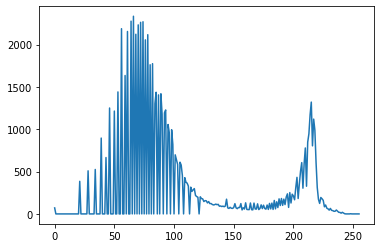

[[189 198 164 ...  66  68  70]
 [201 206 177 ...  64  68  70]
 [207 212 194 ...  64  66  68]
 ...
 [ 72  70  70 ...  59  59  53]
 [ 64  64  66 ...  59  61  53]
 [ 59  61  64 ...  59  59  53]]


In [ ]:
def histogram(data):
  frequency = np.zeros(256)
  for i in range(len(data)):
    for j in range(len(data[0])):
      frequency[data[i][j]] += 1
  plt.plot(frequency)
  plt.show()
  return frequency

frequency = histogram(img)
print(img)

In [ ]:
def teta(t):
  pixels = len(img) * len(img[0])
  teta = 0
  for i in range(0, t):
    teta += frequency[i]/pixels
  return teta

# TEST
teta_182 = teta(182)
teta_182

0.7781380208333337

In [ ]:
def median(t):
  pixels = len(img) * len(img[0])
  median = 0
  for i in range(0, t):
    median += i * frequency[i]/pixels
  return median

median_255 = median(255)
median_255

111.30621093750001

In [ ]:
def varianceB(t):
  teta_t = teta(t)
  median_t = median(t)
  result = pow(median_t - (median_255 * teta_t), 2) 
  result /= teta_t * (1 - teta_t)
  return result

#TEST
varianceB_182 = varianceB(182)
varianceB_182


2800.742118220231

In [ ]:
def maxB():
  max = [0, 0]
  for i in range(len(frequency)):
    varianceB_i = varianceB(i)
    # print(i, varianceB_i, max[1])
    if varianceB_i > max[1]:
      max[0] = i
      max[1] = varianceB_i
  return max[0]


threshold = maxB()
threshold

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


141

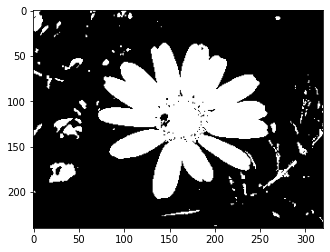

In [ ]:
def object_detect(t):
  detected = np.array(img)
  for i in range(len(img)):
    for j in range(len(img[0])):
      detected[i, j] = 255 if detected[i,j] > t else 0
  return detected

detected = object_detect(threshold)
plt.imshow(cv.cvtColor(detected, cv.COLOR_BGR2RGB))
plt.show()